In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 150

In [ ]:
iris_df = pd.read_csv('/content/Iris.csv', index_col = 'Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

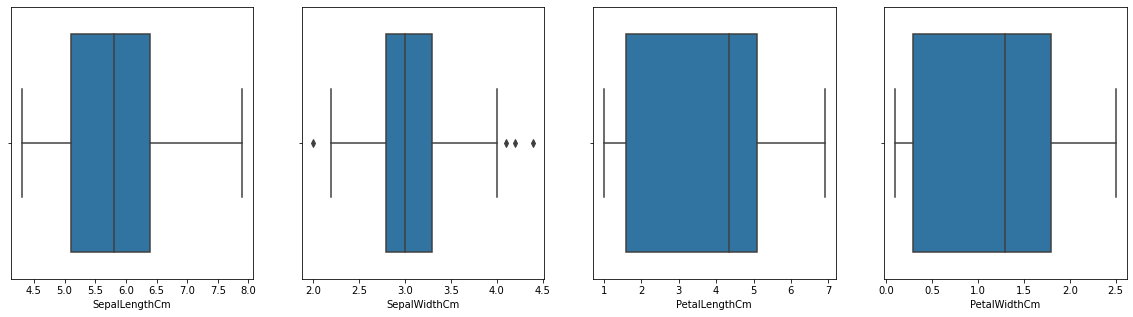

In [ ]:
plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.boxplot(iris_df[i])
    j+=1

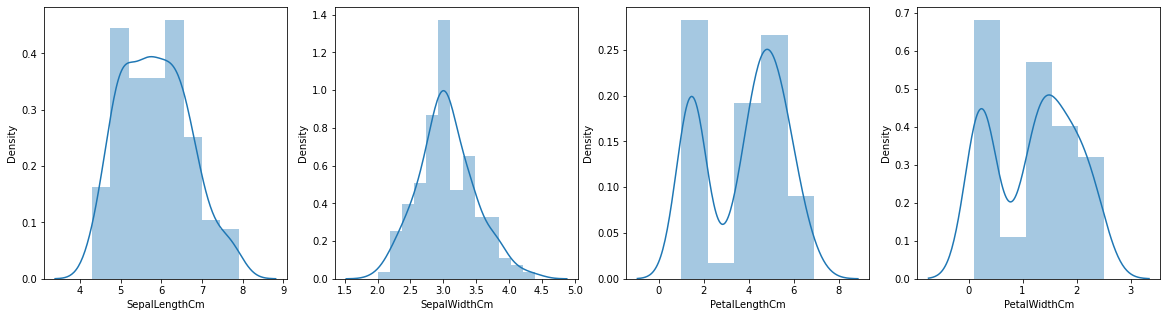

In [ ]:
plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.distplot(iris_df[i])
    j+=1


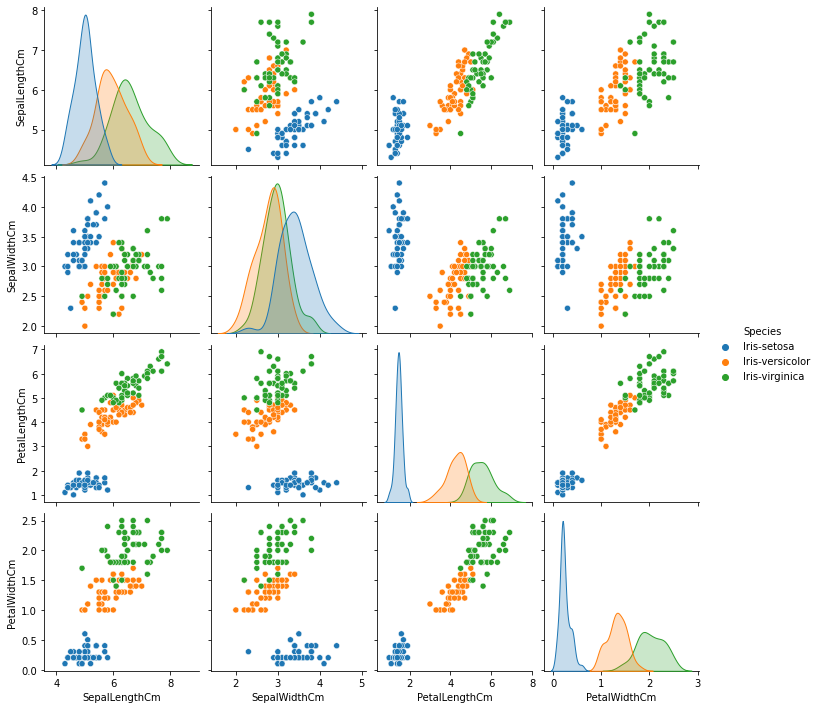

In [ ]:
sns.pairplot(iris_df,hue='Species')
plt.show()

In [ ]:
X = iris_df.drop('Species',axis=1)
y = iris_df.Species
X.shape, y.shape

((150, 4), (150,))

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler    
scaler= StandardScaler()  
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 3, 5, 7, 9]}
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 9]},
             verbose=1)

In [ ]:
print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

Score: 0.9818181818181818 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}


In [ ]:
best_classifier = gs.best_estimator_
best_classifier

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]])

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


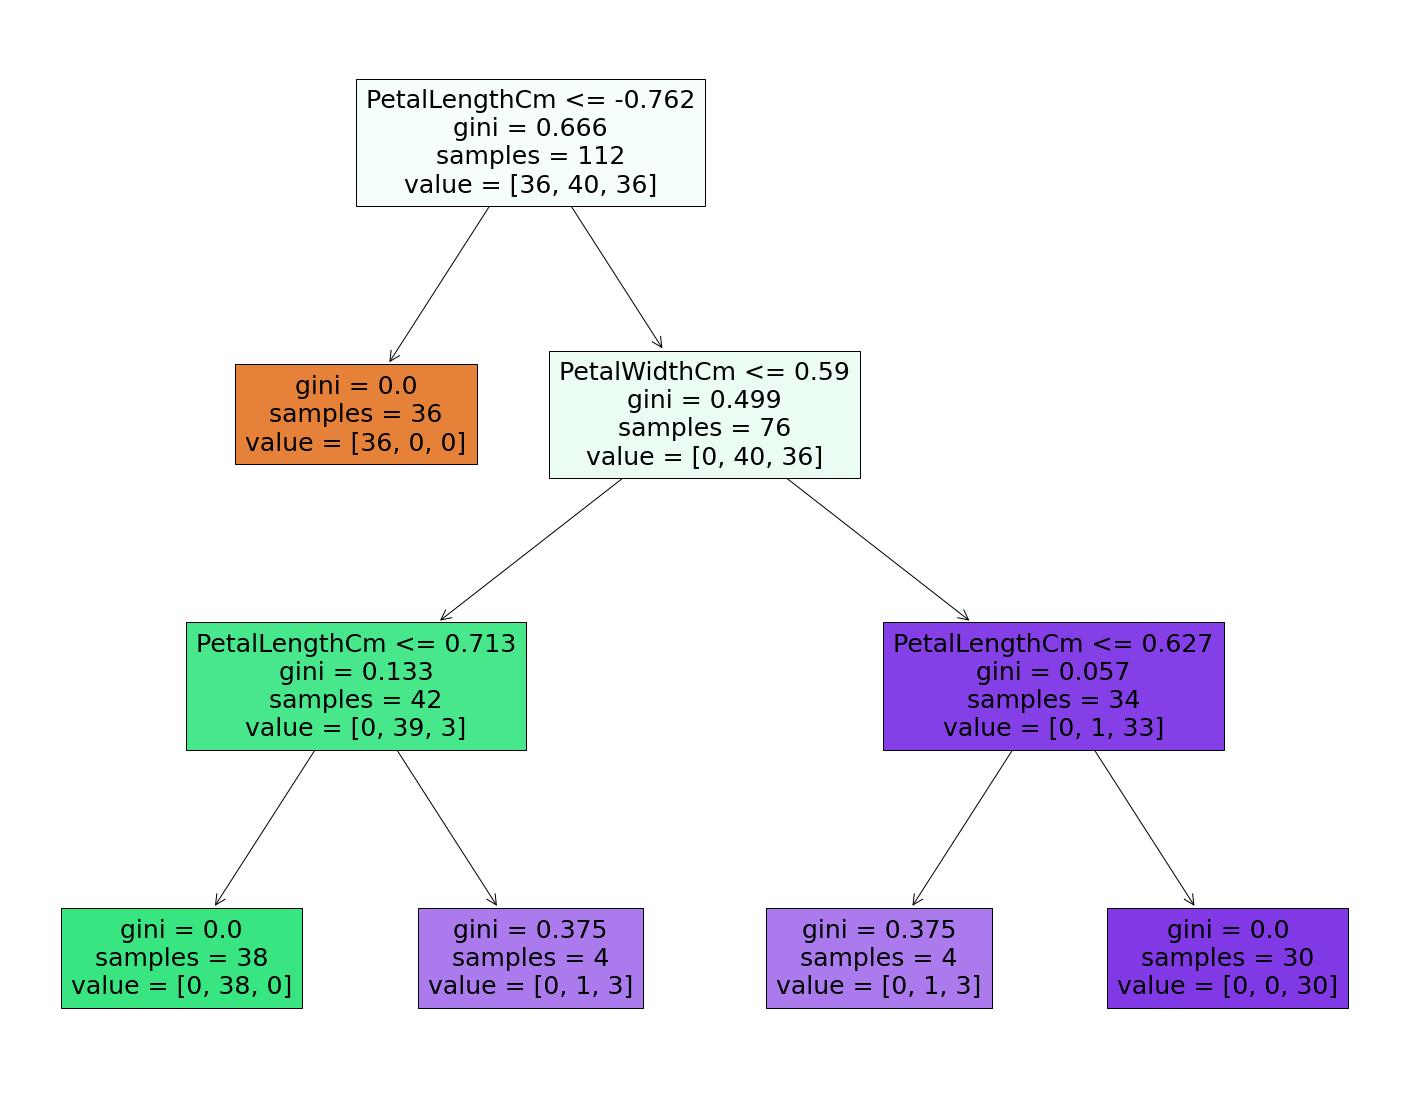

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(best_classifier, feature_names=iris_df.columns, filled=True)
plt.show()